## Requires MARTA_API_KEY set in your environment

Set this line in your `.bashrc`

`export MARTA_API_KEY=YOUR_KEY`

Sign up for a MARTA API key [here](https://www.itsmarta.com/developer-reg-rtt.aspx)!

## Get recent buses near me

We'll look at how to retrieve buses sorted by distance from us

In [1]:
import time
from datetime import datetime, timedelta
from typing import List, Optional, Tuple

from geopy.distance import geodesic
from marta.api import get_buses

## Set my location to near Lenox Square

In [2]:
my_loc = (33.847437, -84.367474)

## Set my location to Georgia Tech

In [3]:
georgia_tech_location = (33.774487, -84.396698)

In [4]:
def get_buses_sorted_by_distance(location: Tuple[float, float], cutoff: Optional[float] = None) -> List:
    """Given a location, returns list of buses sorted by distance from location

    Location should be a (lat, long) tuple. Optional cutoff param will discard
    buses at a distance greater than the supplied cutoff in kilometers.    
    """
    buses = get_buses()
    for bus in buses:
        print(bus.last_updated)

    buses = sorted(buses, key=lambda bus: geodesic((bus.latitude, bus.longitude), location))
    if cutoff:
        buses = [bus for bus in buses if geodesic((bus.latitude, bus.longitude), location) < cutoff]

    return buses

In [5]:
def remove_buses_past_timedelta(buses: List, time_recorded: datetime, cutoff: timedelta) -> List:
    """Removes buses that were recorded past a certain timestamp
    
    Given list of buses, the time they were retrieved, and a timedelta object,
    removes ones that were past a particular time. I.e., remove any
    that are more than ~5 minutes old
    """
    return [bus for bus in buses if time_recorded - bus.last_updated < cutoff]

## Cutoff buses that were recorded more than 5 minutes ago

In [6]:
cutoff_time = timedelta(minutes=15)

In [14]:
print(datetime.now())
print(datetime.now() - datetime.strptime("11/09/2019 02:28:28 PM", "%m/%d/%Y %I:%M:%S %p"))
print(datetime.now() - datetime.strptime("11/9/2019 2:28:28 PM", "%m/%d/%Y %I:%M:%S %p"))

2019-11-09 15:05:35.003051
0:37:07.003328
0:37:07.006274


In [7]:
buses = get_buses_sorted_by_distance(georgia_tech_location, 5)
recorded_time = datetime.now()
buses = remove_buses_past_timedelta(buses, recorded_time, cutoff_time)

MSGTIME:
11/9/2019 2:28:28 PM
2019-11-09T02:28:28
MSGTIME:
11/9/2019 2:29:35 PM
2019-11-09T02:29:35
MSGTIME:
11/9/2019 2:30:49 PM
2019-11-09T02:30:49
MSGTIME:
11/9/2019 2:31:06 PM
2019-11-09T02:31:06
MSGTIME:
11/9/2019 2:31:29 PM
2019-11-09T02:31:29
MSGTIME:
11/9/2019 2:32:04 PM
2019-11-09T02:32:04
MSGTIME:
11/9/2019 2:33:37 PM
2019-11-09T02:33:37
MSGTIME:
11/9/2019 2:33:59 PM
2019-11-09T02:33:59
MSGTIME:
11/9/2019 2:34:01 PM
2019-11-09T02:34:01
MSGTIME:
11/9/2019 2:34:09 PM
2019-11-09T02:34:09
MSGTIME:
11/9/2019 2:36:04 PM
2019-11-09T02:36:04
MSGTIME:
11/9/2019 2:37:00 PM
2019-11-09T02:37:00
MSGTIME:
11/9/2019 2:37:13 PM
2019-11-09T02:37:13
MSGTIME:
11/9/2019 2:37:18 PM
2019-11-09T02:37:18
MSGTIME:
11/9/2019 2:37:56 PM
2019-11-09T02:37:56
MSGTIME:
11/9/2019 2:38:09 PM
2019-11-09T02:38:09
MSGTIME:
11/9/2019 2:38:51 PM
2019-11-09T02:38:51
MSGTIME:
11/9/2019 2:39:24 PM
2019-11-09T02:39:24
MSGTIME:
11/9/2019 2:39:25 PM
2019-11-09T02:39:25
MSGTIME:
11/9/2019 2:39:31 PM
2019-11-09T02:39:31


In [8]:
buses[0].last_updated

IndexError: list index out of range

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

Time: 2019-11-09 13:47:04.422448


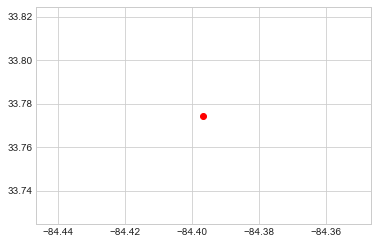

Time: 2019-11-09 13:47:34.937680


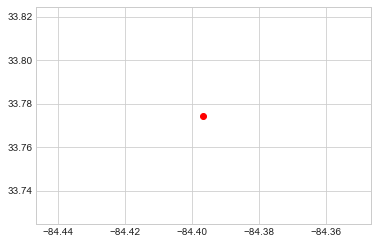

Time: 2019-11-09 13:48:05.360865


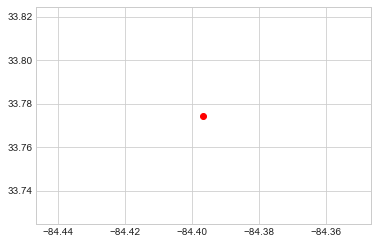

Time: 2019-11-09 13:48:35.877511


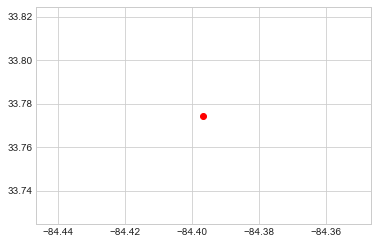

Time: 2019-11-09 13:49:06.385717


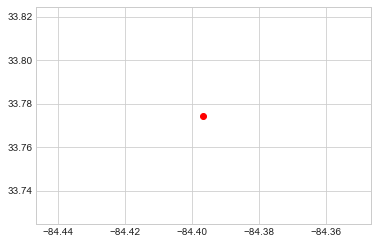

Time: 2019-11-09 13:49:36.835124


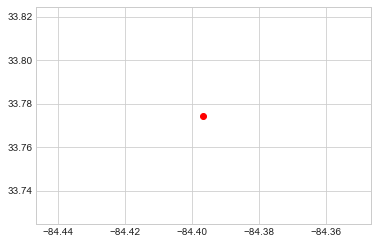

Time: 2019-11-09 13:50:07.287404


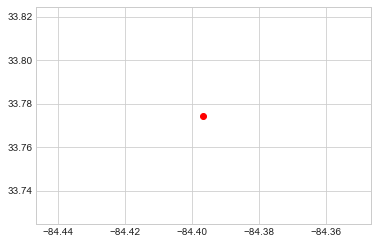

Time: 2019-11-09 13:50:38.060634


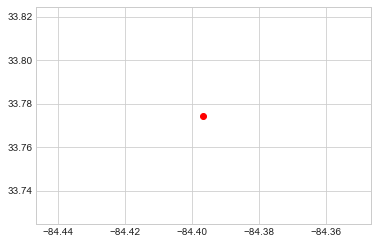

Time: 2019-11-09 13:51:08.782376


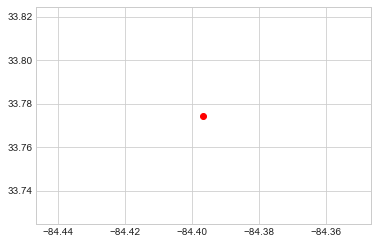

Time: 2019-11-09 13:51:39.296872


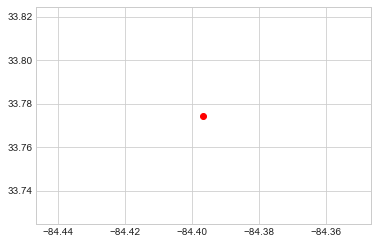

In [9]:
for _ in range(10):
    buses = get_buses_sorted_by_distance(georgia_tech_location, 5)
    recorded_time = datetime.now()
    print(f"Time: {recorded_time}")
    buses = remove_buses_past_timedelta(buses, recorded_time, cutoff_time)

    x = [float(bus.longitude) for bus in buses]
    y = [float(bus.latitude) for bus in buses]

    plt.plot(x, y, 'o', color='black');
    plt.plot(georgia_tech_location[1], georgia_tech_location[0], 'o', color='red')
    plt.ylim([georgia_tech_location[0]-0.05, georgia_tech_location[0]+0.05])
    plt.xlim([georgia_tech_location[1]-0.05, georgia_tech_location[1]+0.05])
    plt.show()
    time.sleep(30)